In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings ("ignore")
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:/Users/DELL/Downloads/data (1).xlsx")
df.head()

time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                 867.63                910.42   
1 2017-01-01 00:05:00                 879.23                918.14   
2 2017-01-01 00:10:00                 875.67                924.18   
3 2017-01-01 00:15:00                 875.28                923.15   
4 2017-01-01 00:20:00                 891.66                934.26   

  Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                  -189.54            -186.04                  852.13   
1                  -184.33             -182.1                  862.53   
2                  -181.26            -166.47                  866.06   
3                  -179.15            -174.83                  865.85   
4                  -178.32            -173.72                  876.06   

  Cyclone_Inlet_Draft  
0              -145.9  
1             -149.76  
2             -145.01  
3             -142.82  
4             -143.39

## Basic Analysis of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [10]:
df.shape

(377719, 7)

In [12]:
df.size

2644033

In [14]:
col= df.columns.to_list()
col

['time',
 'Cyclone_Inlet_Gas_Temp',
 'Cyclone_Material_Temp',
 'Cyclone_Outlet_Gas_draft',
 'Cyclone_cone_draft',
 'Cyclone_Gas_Outlet_Temp',
 'Cyclone_Inlet_Draft']

## Observation
The data set has 377719 rows and 7 columns.
There are 6 columns with category  values, 1 columns with datatime . The category columnn which has to change the numerical columns for further analysis. 

In [17]:
num_col = df.select_dtypes(include ='number').columns.to_list()
num_col

[]

In [19]:
cat_col = df.select_dtypes(exclude ='number').columns.to_list()
cat_col

['time',
 'Cyclone_Inlet_Gas_Temp',
 'Cyclone_Material_Temp',
 'Cyclone_Outlet_Gas_draft',
 'Cyclone_cone_draft',
 'Cyclone_Gas_Outlet_Temp',
 'Cyclone_Inlet_Draft']

## Missing Value Treatment

In [24]:
print('Percentage of null values \n',(df.isna().sum() / len(df)*100))

Percentage of null values 
 time                        0.0
Cyclone_Inlet_Gas_Temp      0.0
Cyclone_Material_Temp       0.0
Cyclone_Outlet_Gas_draft    0.0
Cyclone_cone_draft          0.0
Cyclone_Gas_Outlet_Temp     0.0
Cyclone_Inlet_Draft         0.0
dtype: float64


There is no null value in the given dataset.

In [ ]:
## Changing the Datatype 

In [28]:
df['time'].dtype

dtype('<M8[ns]')

In [30]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Confirm the index change
print(df.index)

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:05:00',
               '2017-01-01 00:10:00', '2017-01-01 00:15:00',
               '2017-01-01 00:20:00', '2017-01-01 00:25:00',
               '2017-01-01 00:30:00', '2017-01-01 00:35:00',
               '2017-01-01 00:40:00', '2017-01-01 00:45:00',
               ...
               '2020-08-07 11:30:00', '2020-08-07 11:35:00',
               '2020-08-07 11:40:00', '2020-08-07 11:45:00',
               '2020-08-07 11:50:00', '2020-08-07 11:55:00',
               '2020-08-07 12:00:00', '2020-08-07 12:05:00',
               '2020-08-07 12:10:00', '2020-08-07 12:15:00'],
              dtype='datetime64[ns]', name='time', length=377719, freq=None)


## Performing Value count for each categoery 

In [35]:
for i  in df:
    print(df[i].value_counts())
    print()
    print('****')

Cyclone_Inlet_Gas_Temp
Not Connect    723
I/O Timeout    470
23.53          309
900.12         161
879.55         159
              ... 
554.57           1
556.18           1
1016.36          1
979.49           1
986.66           1
Name: count, Length: 39736, dtype: int64

****
Cyclone_Material_Temp
0.00       14226
94.31       3669
59.56       3409
41.64       2865
43.14       2829
           ...  
463.66         1
1056.38        1
1032.63        1
1048.87        1
823.93         1
Name: count, Length: 39662, dtype: int64

****
Cyclone_Outlet_Gas_draft
 Not Connect    723
 I/O Timeout    470
 1.33           224
 1.71           220
 1.34           212
               ... 
-119.15           1
-85.7             1
-101.79           1
-97.47            1
-294.94           1
Name: count, Length: 27669, dtype: int64

****
Cyclone_cone_draft
 Not Connect    723
 I/O Timeout    470
-0.57           329
-0.59           316
-0.58           307
               ... 
-299.72           1
-294.94       

## Checking the duplicates

In [51]:
for i in df:
    print(f'{i} is {df[i].duplicated().sum()}')
    print()
    print("****")

Cyclone_Inlet_Gas_Temp is 337983

****
Cyclone_Material_Temp is 338057

****
Cyclone_Outlet_Gas_draft is 350050

****
Cyclone_cone_draft is 351232

****
Cyclone_Gas_Outlet_Temp is 329675

****
Cyclone_Inlet_Draft is 353709

****


Since all the variables are related with time,each time is unique .  Since we have duplicate values , we cannot delete because it is temperature . Temperature may remain same for different days

In [54]:
# Checking the anaomaolies
for i in df:
    print(df[i].unique())
    print()
    print('*****')

[867.63 879.23 875.67 ... 1025.83 1028.53 986.66]

*****
[910.42 918.14 924.18 ... 780.52 801.17 823.93]

*****
[-189.54 -184.33 -181.26 ... -153.23 -149.8 -294.94]

*****
[-186.04 -182.1 -166.47 ... -110.59 -114.64 -117.29]

*****
[852.13 862.53 866.06 ... 751.93 753.13 751.26]

*****
[-145.9 -149.76 -145.01 ... -113.58 -126.52 -101.1]

*****


In [58]:
## Changing the Categorical  variable into numeric  data type
def find_non_numeric_values(df, column_name):
    non_numeric_values = df[column_name][df[column_name].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]
    return non_numeric_values.unique()

In [64]:
non_numeric_inlet_gas= find_non_numeric_values(df, 'Cyclone_Inlet_Gas_Temp')
print(non_numeric_inlet_gas)

['I/O Timeout' 'Not Connect' 'Scan Timeout' 'Configure' 'Comm Fail']


In [70]:
non_numeric_cone_draft= find_non_numeric_values(df, 'Cyclone_cone_draft')
print(non_numeric_cone_draft)

[-186.04 -182.1 -166.47 ... -110.59 -114.64 -117.29]


In [68]:
non_numeric_Gas_Outlet_Temp= find_non_numeric_values(df, 'Cyclone_Gas_Outlet_Temp')
print(non_numeric_Gas_Outlet_Temp)

['I/O Timeout' 'Not Connect' 'Scan Timeout' 'Configure' 'Unit Down'
 'Comm Fail']


In [72]:
non_numeric_Inlet_Draft= find_non_numeric_values(df, 'Cyclone_Inlet_Draft')
print(non_numeric_Inlet_Draft)

[-145.9 -149.76 -145.01 ... -113.58 -126.52 -101.1]


In [74]:
non_numeric_Material_Temp= find_non_numeric_values(df, 'Cyclone_Material_Temp')
print(non_numeric_Material_Temp)

['I/O Timeout' 'Unit Down' -96.3 -46.7 -185 -80.73 -165.18 'Not Connect'
 'Scan Timeout' 'Configure' -181.34 -165.07 -146.74 -140.15 -103.61
 -157.55 -184.22 -163.46 -2.81 -45.38 -173.63 -12.5 -168.55 -158.3 -123.76
 -176.41 -48.98 -119.01 -5.12 -55.41 -54.05 -164.84 -47.96 -22.55 -168.92
 -153.98 -27.48 -154.15 -174.83 -159.58 -158.35 'Comm Fail']


In [76]:
non_numeric_Outlet_Gas_draft= find_non_numeric_values(df, 'Cyclone_Outlet_Gas_draft')
print(non_numeric_Outlet_Gas_draft)

[-189.54 -184.33 -181.26 ... -153.23 -149.8 -294.94]


In [78]:
# Convert column to numeric and coerce invalid values to NaN
df['Cyclone_Inlet_Gas_Temp'] = pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'], errors='coerce')

In [80]:
df['Cyclone_cone_draft'] = pd.to_numeric(df['Cyclone_cone_draft'], errors='coerce')

In [82]:
df['Cyclone_Gas_Outlet_Temp'] = pd.to_numeric(df['Cyclone_Gas_Outlet_Temp'], errors='coerce')

In [84]:
df['Cyclone_Inlet_Draft'] = pd.to_numeric(df['Cyclone_Inlet_Draft'], errors='coerce')

In [86]:
df['Cyclone_Material_Temp'] = pd.to_numeric(df['Cyclone_Material_Temp'], errors='coerce')

In [88]:
df['Cyclone_Outlet_Gas_draft'] = pd.to_numeric(df['Cyclone_Outlet_Gas_draft'], errors='coerce')

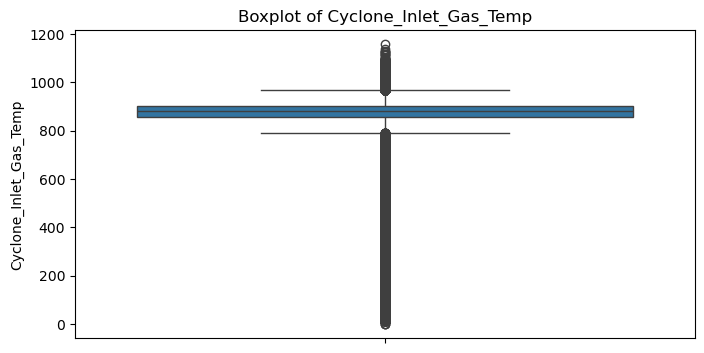

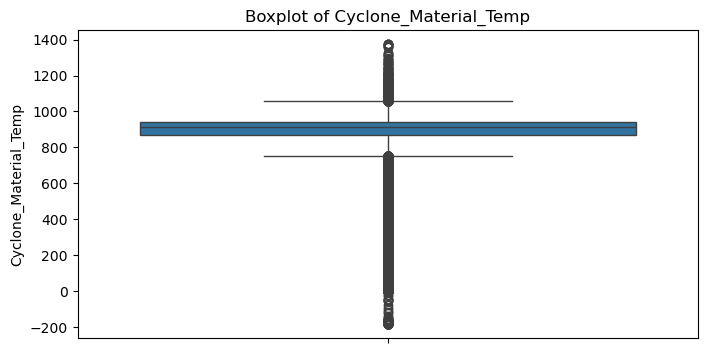

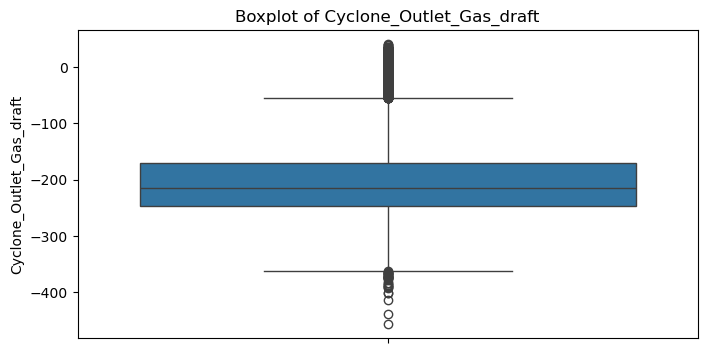

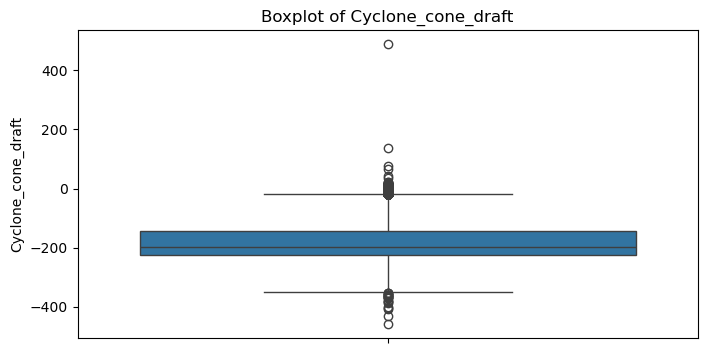

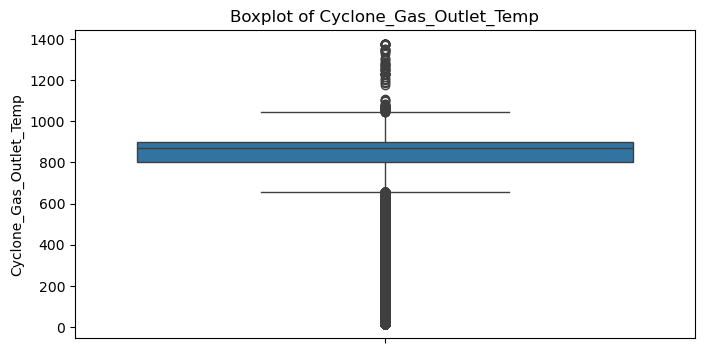

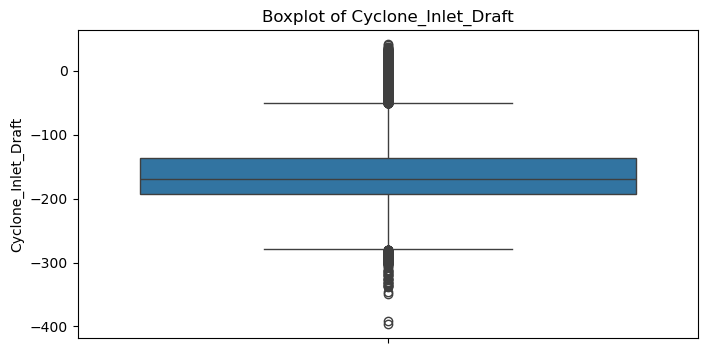

In [103]:
# Loop through each column and plot the boxplot
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

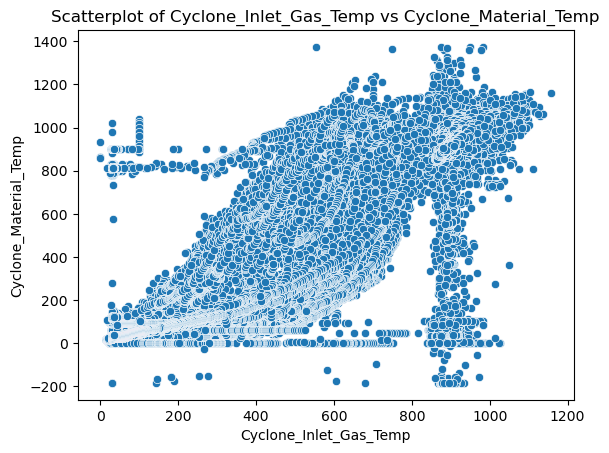

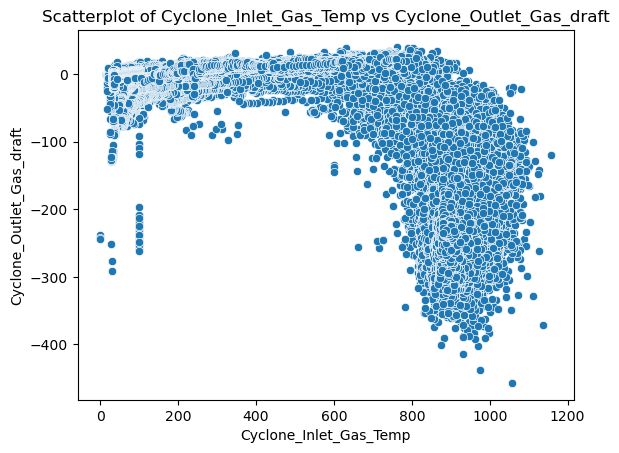

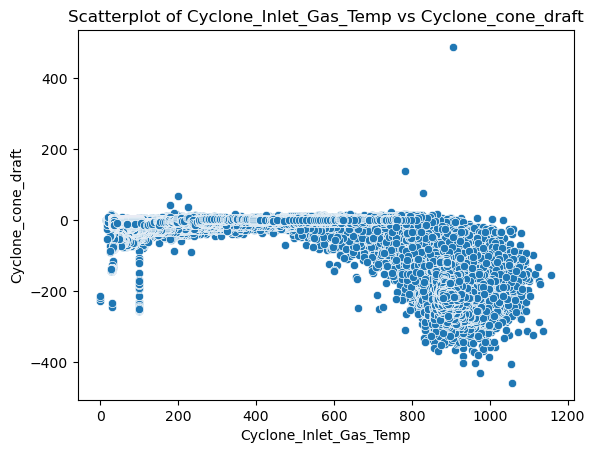

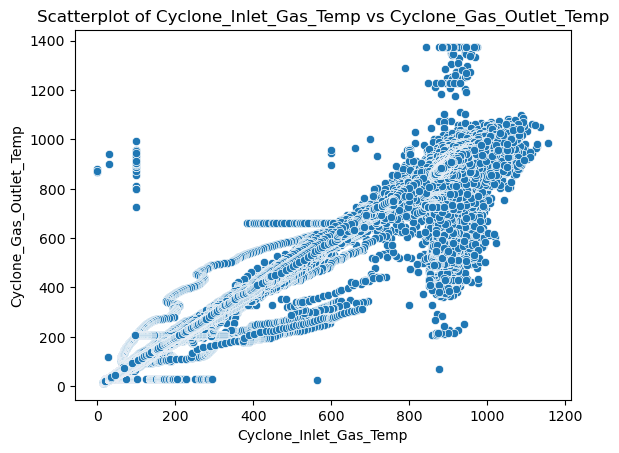

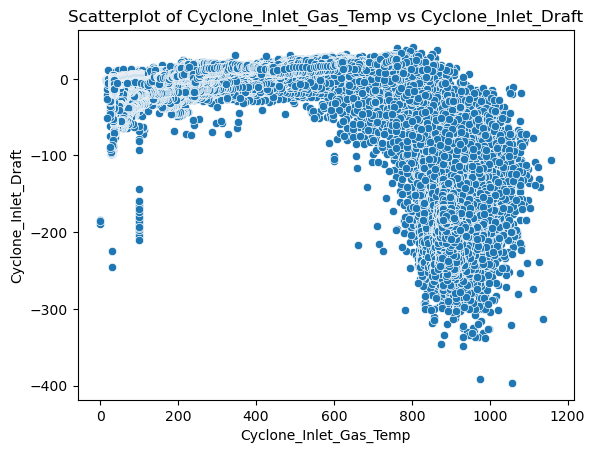

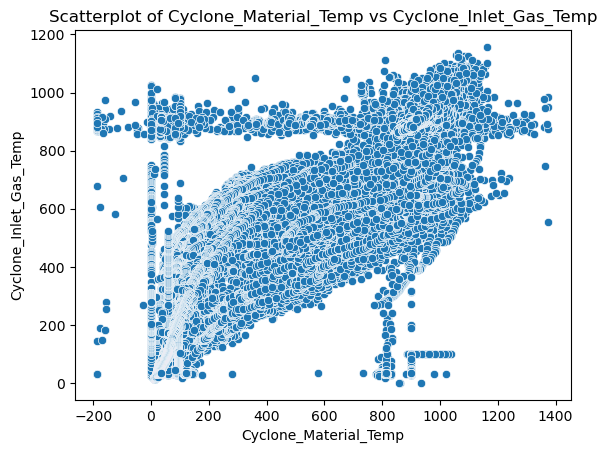

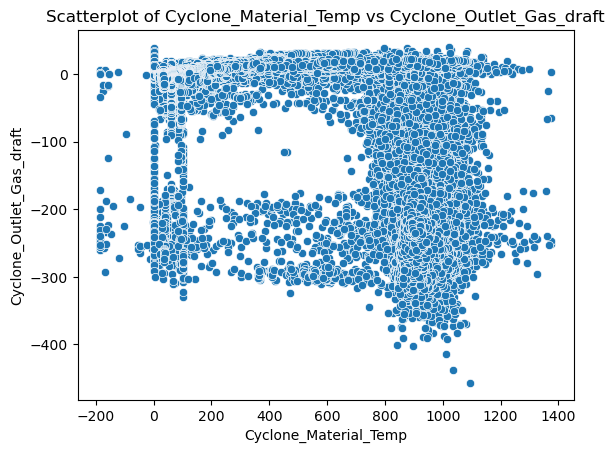

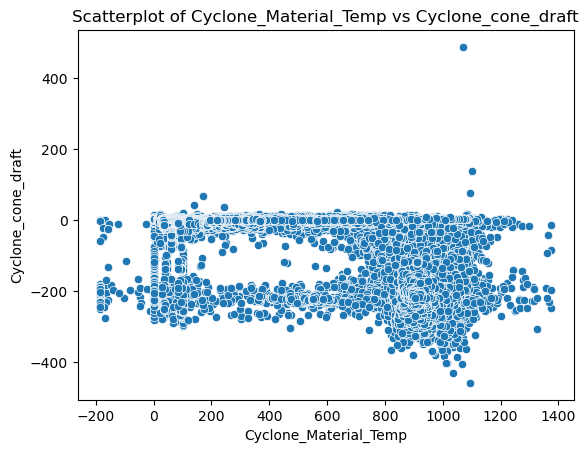

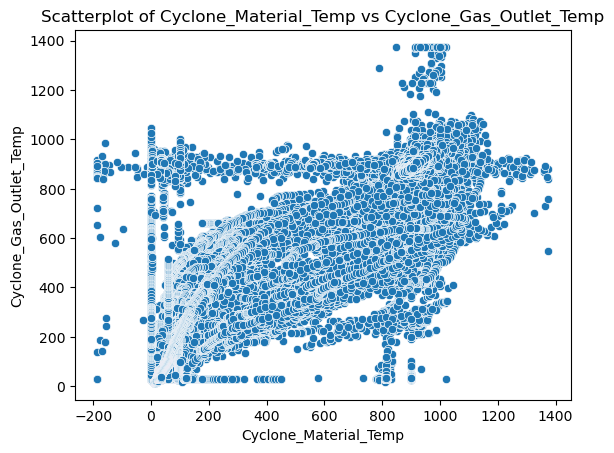

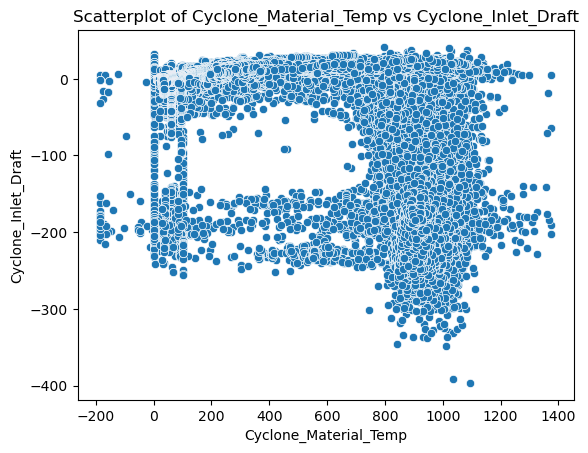

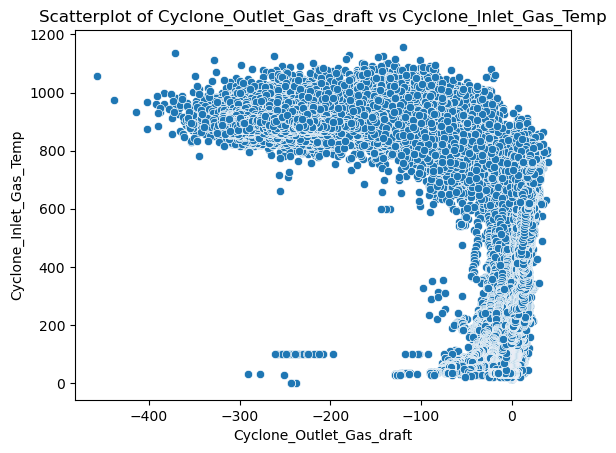

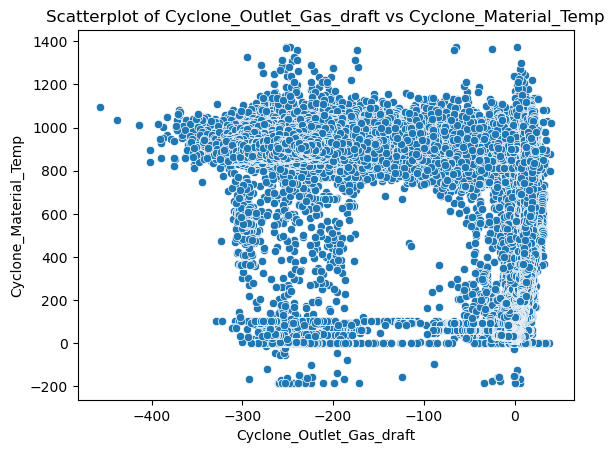

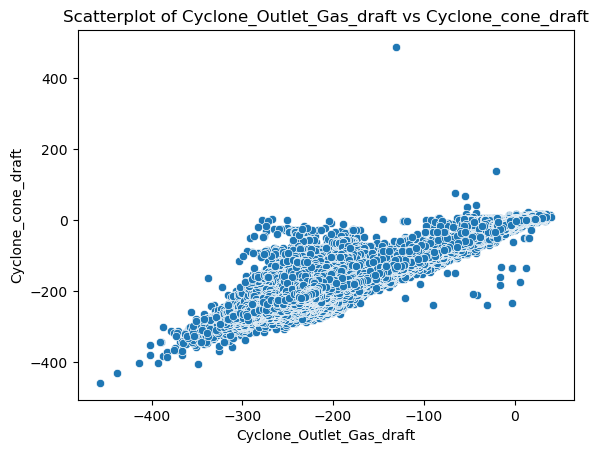

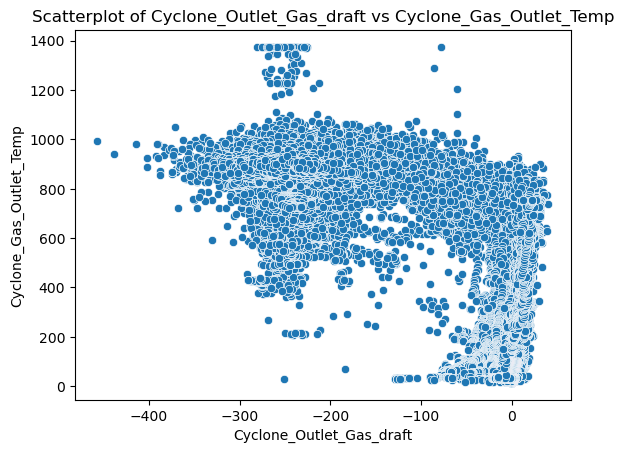

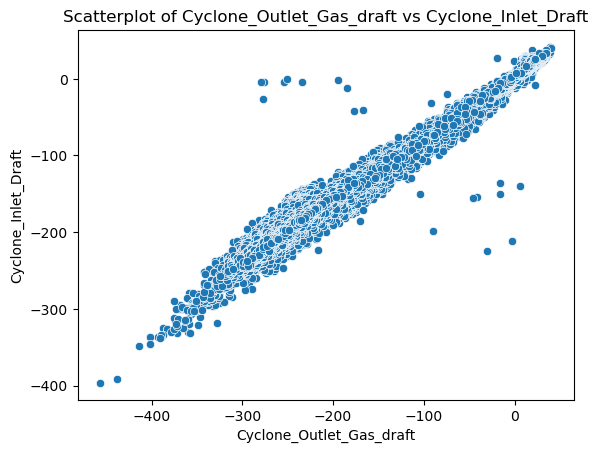

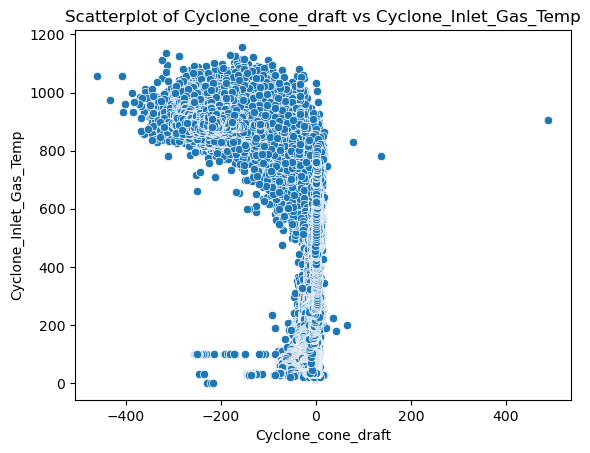

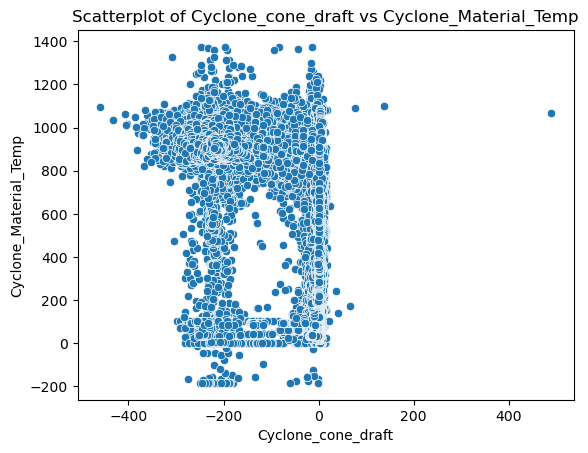

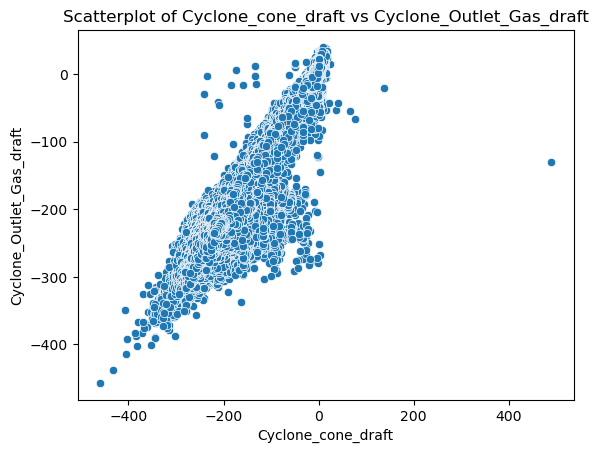

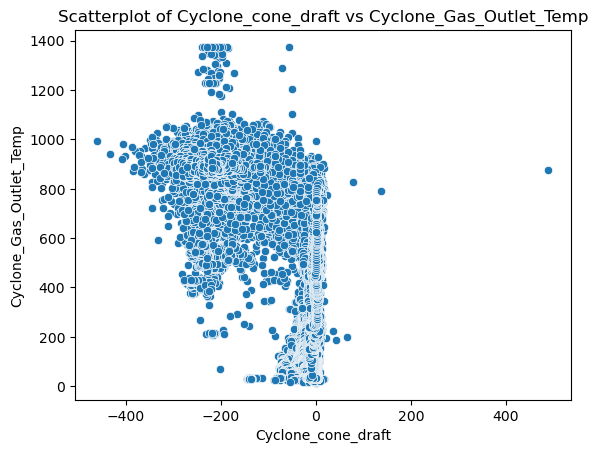

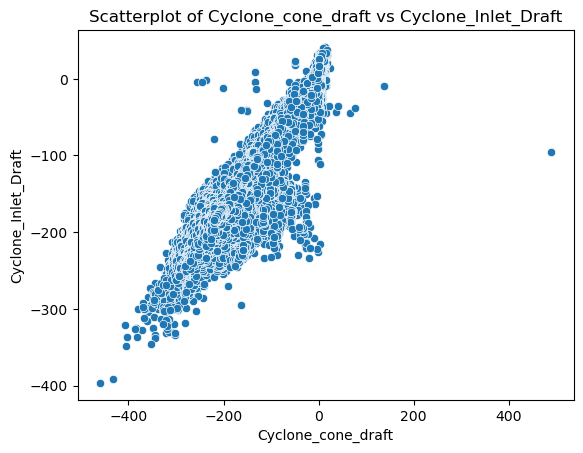

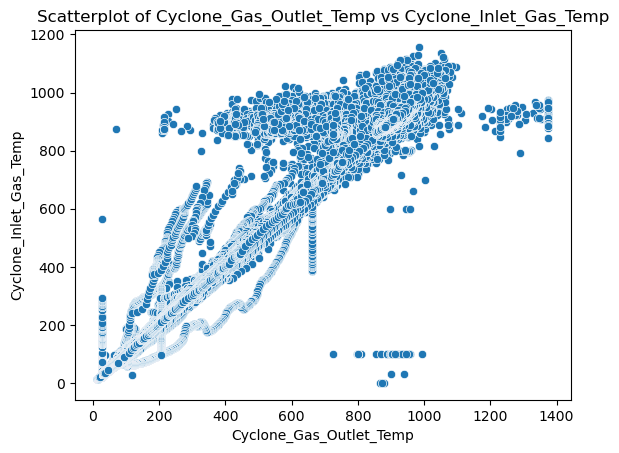

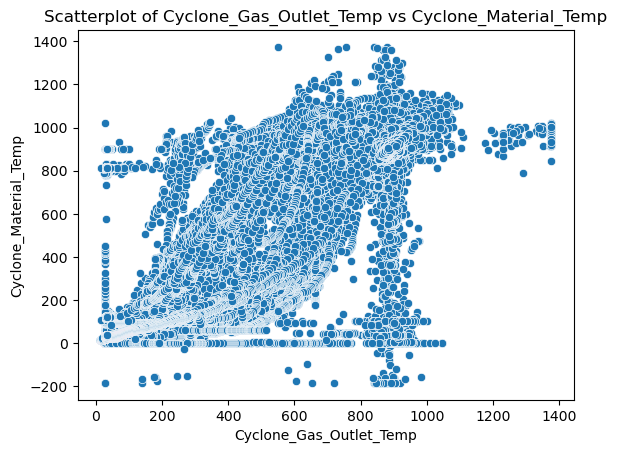

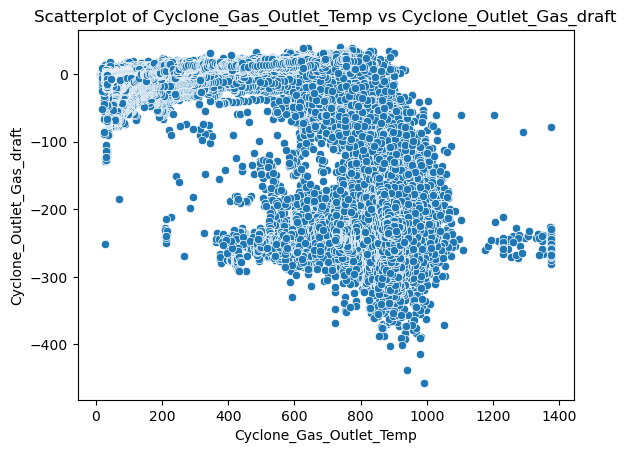

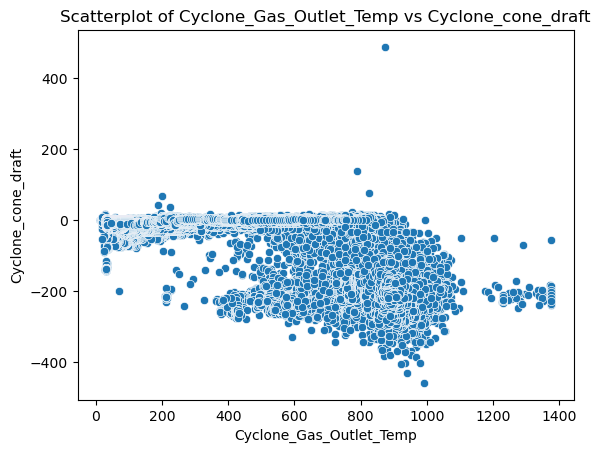

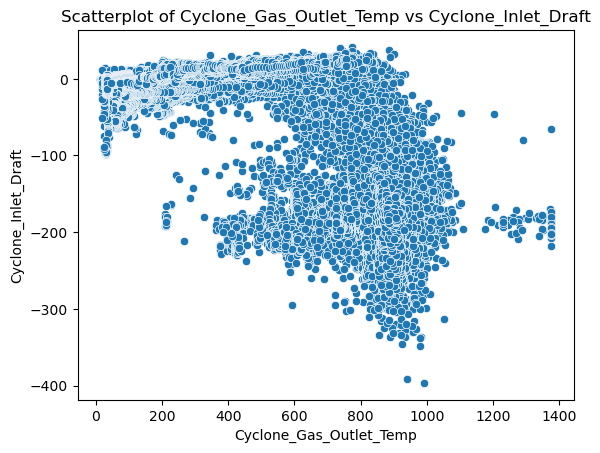

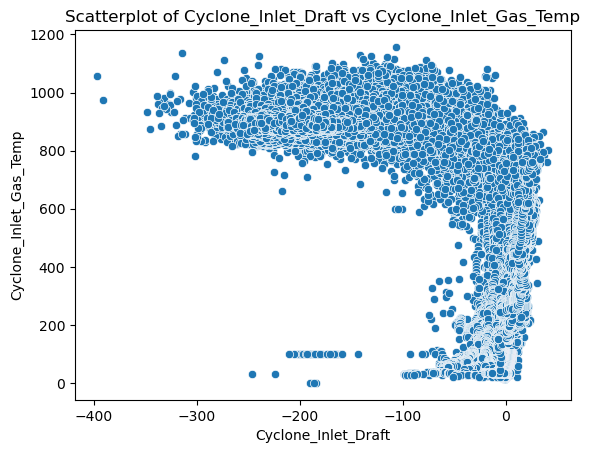

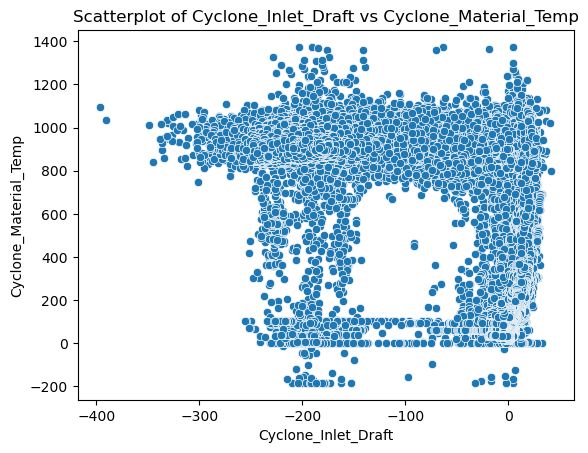

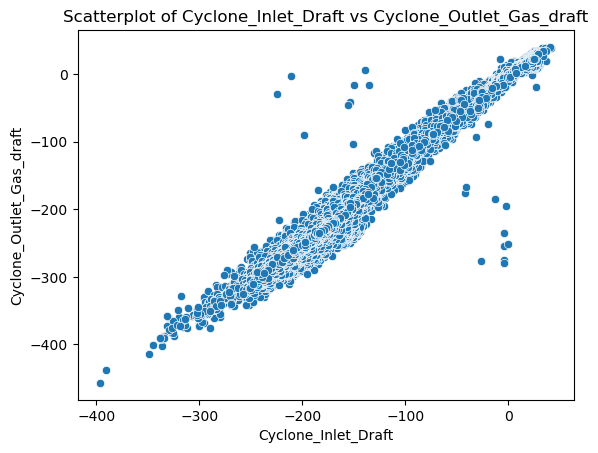

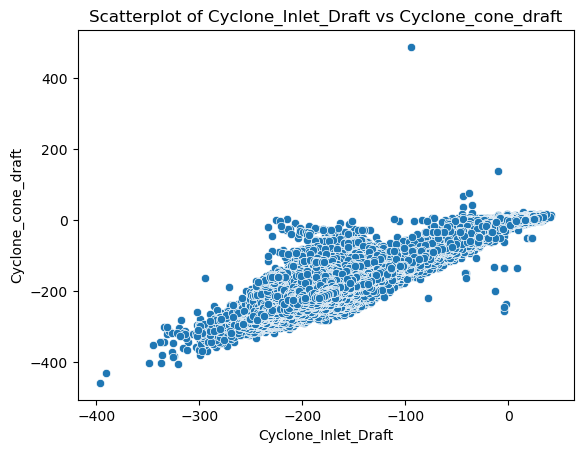

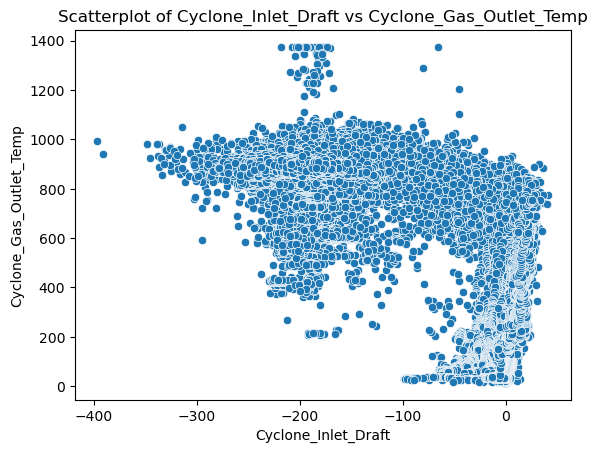

In [105]:
## bi varaiant analysis

for i in df:
    for j in df:
        if i!=j:
            sns.scatterplot(x= df[i],y=df[j])
            plt.title(f'Scatterplot of {i} vs {j}')
            plt.show()

In [90]:
df.corr()

Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
Cyclone_Inlet_Gas_Temp                  1.000000               0.964728   
Cyclone_Material_Temp                   0.964728               1.000000   
Cyclone_Outlet_Gas_draft               -0.903032              -0.880614   
Cyclone_cone_draft                     -0.899646              -0.877584   
Cyclone_Gas_Outlet_Temp                 0.990970               0.957382   
Cyclone_Inlet_Draft                    -0.901817              -0.879356   

                          Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
Cyclone_Inlet_Gas_Temp                   -0.903032           -0.899646   
Cyclone_Material_Temp                    -0.880614           -0.877584   
Cyclone_Outlet_Gas_draft                  1.000000            0.968425   
Cyclone_cone_draft                        0.968425            1.000000   
Cyclone_Gas_Outlet_Temp                  -0.898729           -0.893098   
Cyclone_Inlet_Draft                       0.995442            0.969447   

                          Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  
Cyclone_Inlet_Gas_Temp                   0.990970            -0.901817  
Cyclone_Material_Temp                    0.957382            -0.879356  
Cyclone_Outlet_Gas_draft                -0.898729             0.995442  
Cyclone_cone_draft                      -0.893098             0.969447  
Cyclone_Gas_Outlet_Temp                  1.000000            -0.898523  
Cyclone_Inlet_Draft                     -0.898523             1.000000

<Axes: >

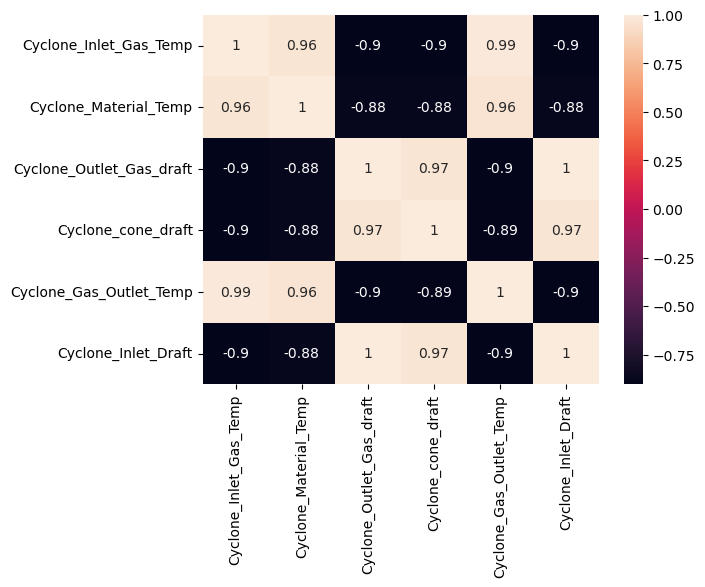

In [94]:
sns.heatmap(df.corr(),annot = True)

Cyclone_Inlet_Gas_Temp and Cyclone_Gas_Outlet_Temp: These variables are almost perfectly correlated (0.99), indicating that the inlet gas temperature strongly determines the outlet gas temperature.

Cyclone_Inlet_Gas_Temp and Cyclone_Material_Temp: A strong positive correlation (0.96) suggests that material temperature is highly influenced by the inlet gas temperature.

Cyclone_cone_draft and Cyclone_Outlet_Gas_draft: A strong positive correlation (0.97) shows that the pressure at the cone section and outlet are tightly connected.

Cyclone_Material_Temp and Cyclone_Outlet_Gas_draft: These variables exhibit a weaker inverse correlation (-0.88), implying a less direct relationship between material temperature and outlet draft pressure.

Cyclone_cone_draft and Cyclone_Gas_Outlet_Temp: The weak negative correlation (-0.89) suggests that cone pressure and outlet gas temperature have an inverse but weaker dependency.

In [107]:
## Checking the outliers
num1=df.select_dtypes(include='number').columns.to_list()
num1

['Cyclone_Inlet_Gas_Temp',
 'Cyclone_Material_Temp',
 'Cyclone_Outlet_Gas_draft',
 'Cyclone_cone_draft',
 'Cyclone_Gas_Outlet_Temp',
 'Cyclone_Inlet_Draft']

In [113]:
df[num1].skew()

Cyclone_Inlet_Gas_Temp     -1.529483
Cyclone_Material_Temp      -1.484175
Cyclone_Outlet_Gas_draft    1.028469
Cyclone_cone_draft          0.988314
Cyclone_Gas_Outlet_Temp    -1.487048
Cyclone_Inlet_Draft         1.037906
dtype: float64

In [109]:
q1 = df[num1].quantile(0.25)
q3 = df[num1].quantile(0.75)

iqr = q3-q1
uw = q3+(1.5 * iqr)
lw = q1-(1.5 * iqr)

filtered_df = df[(df[num1]>=lw) & (df[num1]<=uw)]
filtered_df

Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
time                                                                 
2017-01-01 00:00:00                  867.63                 910.42   
2017-01-01 00:05:00                  879.23                 918.14   
2017-01-01 00:10:00                  875.67                 924.18   
2017-01-01 00:15:00                  875.28                 923.15   
2017-01-01 00:20:00                  891.66                 934.26   
...                                     ...                    ...   
2020-08-07 11:55:00                  899.42                 919.79   
2020-08-07 12:00:00                  879.90                 895.02   
2020-08-07 12:05:00                  887.20                 895.70   
2020-08-07 12:10:00                  908.50                 916.33   
2020-08-07 12:15:00                  880.86                 905.31   

                     Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
time                                                                
2017-01-01 00:00:00                   -189.54             -186.04   
2017-01-01 00:05:00                   -184.33             -182.10   
2017-01-01 00:10:00                   -181.26             -166.47   
2017-01-01 00:15:00                   -179.15             -174.83   
2017-01-01 00:20:00                   -178.32             -173.72   
...                                       ...                 ...   
2020-08-07 11:55:00                   -224.07             -209.77   
2020-08-07 12:00:00                   -228.04             -211.28   
2020-08-07 12:05:00                   -230.11             -214.65   
2020-08-07 12:10:00                   -231.51             -218.09   
2020-08-07 12:15:00                   -235.02             -219.44   

                     Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  
time                                                               
2017-01-01 00:00:00                   852.13              -145.90  
2017-01-01 00:05:00                   862.53              -149.76  
2017-01-01 00:10:00                   866.06              -145.01  
2017-01-01 00:15:00                   865.85              -142.82  
2017-01-01 00:20:00                   876.06              -143.39  
...                                      ...                  ...  
2020-08-07 11:55:00                   901.01              -175.15  
2020-08-07 12:00:00                   878.08              -176.94  
2020-08-07 12:05:00                   885.32              -179.18  
2020-08-07 12:10:00                   906.20              -181.96  
2020-08-07 12:15:00                   882.10              -184.02  

[377719 rows x 6 columns]

This filtered_data has the data without the outliers
But there is need of these outliers because there are some datas lies in the outliers which can be useful to analyse the given data set.
So i am proceeding with the data set without removing the outliers
If neccessary we can remove it under some of the specific condition

In [ ]:
## Feature Engineering
Performing 7 Rolling average 

In [115]:
df['Cyclone_Inlet_Gas_Temp_Rolling_Mean'] = df['Cyclone_Inlet_Gas_Temp'].rolling(window='7D').mean()
print(df['Cyclone_Inlet_Gas_Temp_Rolling_Mean'])

time
2017-01-01 00:00:00    867.630000
2017-01-01 00:05:00    873.430000
2017-01-01 00:10:00    874.176667
2017-01-01 00:15:00    874.452500
2017-01-01 00:20:00    877.894000
                          ...    
2020-08-07 11:55:00    889.711305
2020-08-07 12:00:00    889.704499
2020-08-07 12:05:00    889.708948
2020-08-07 12:10:00    889.719638
2020-08-07 12:15:00    889.712316
Name: Cyclone_Inlet_Gas_Temp_Rolling_Mean, Length: 377719, dtype: float64


In [117]:
df['Cyclone_cone_draft_Temp_Rolling_Mean'] = df['Cyclone_cone_draft'].rolling(window='7D').mean()
df['Cyclone_cone_draft_Temp_Rolling_Mean']

time
2017-01-01 00:00:00   -186.040000
2017-01-01 00:05:00   -184.070000
2017-01-01 00:10:00   -178.203333
2017-01-01 00:15:00   -177.360000
2017-01-01 00:20:00   -176.632000
                          ...    
2020-08-07 11:55:00   -208.684226
2020-08-07 12:00:00   -208.668373
2020-08-07 12:05:00   -208.656642
2020-08-07 12:10:00   -208.640625
2020-08-07 12:15:00   -208.632024
Name: Cyclone_cone_draft_Temp_Rolling_Mean, Length: 377719, dtype: float64

In [119]:
df['Cyclone_Gas_Outlet_Temp_Rolling_Mean'] = df['Cyclone_Gas_Outlet_Temp'].rolling(window='7D').mean()
df['Cyclone_Gas_Outlet_Temp_Rolling_Mean']

time
2017-01-01 00:00:00    852.130000
2017-01-01 00:05:00    857.330000
2017-01-01 00:10:00    860.240000
2017-01-01 00:15:00    861.642500
2017-01-01 00:20:00    864.526000
                          ...    
2020-08-07 11:55:00    889.316910
2020-08-07 12:00:00    889.307986
2020-08-07 12:05:00    889.308948
2020-08-07 12:10:00    889.317783
2020-08-07 12:15:00    889.309296
Name: Cyclone_Gas_Outlet_Temp_Rolling_Mean, Length: 377719, dtype: float64

In [121]:
df['Cyclone_Inlet_Draft_Rolling_Mean'] = df['Cyclone_Inlet_Draft'].rolling(window='7D').mean()
df['Cyclone_Inlet_Draft_Rolling_Mean']

time
2017-01-01 00:00:00   -145.900000
2017-01-01 00:05:00   -147.830000
2017-01-01 00:10:00   -146.890000
2017-01-01 00:15:00   -145.872500
2017-01-01 00:20:00   -145.376000
                          ...    
2020-08-07 11:55:00   -183.661091
2020-08-07 12:00:00   -183.650223
2020-08-07 12:05:00   -183.643125
2020-08-07 12:10:00   -183.632649
2020-08-07 12:15:00   -183.628993
Name: Cyclone_Inlet_Draft_Rolling_Mean, Length: 377719, dtype: float64

In [123]:
df['Cyclone_Material_Temp_Rolling_Mean'] = df['Cyclone_Material_Temp'].rolling(window='7D').mean()
df['Cyclone_Material_Temp_Rolling_Mean']

time
2017-01-01 00:00:00    910.420000
2017-01-01 00:05:00    914.280000
2017-01-01 00:10:00    917.580000
2017-01-01 00:15:00    918.972500
2017-01-01 00:20:00    922.030000
                          ...    
2020-08-07 11:55:00    904.332932
2020-08-07 12:00:00    904.319920
2020-08-07 12:05:00    904.331471
2020-08-07 12:10:00    904.333931
2020-08-07 12:15:00    904.329861
Name: Cyclone_Material_Temp_Rolling_Mean, Length: 377719, dtype: float64

In [125]:
df['Cyclone_Outlet_Gas_draft_Rolling_Mean'] = df['Cyclone_Outlet_Gas_draft'].rolling(window='7D').mean()
df['Cyclone_Outlet_Gas_draft_Rolling_Mean']

time
2017-01-01 00:00:00   -189.540000
2017-01-01 00:05:00   -186.935000
2017-01-01 00:10:00   -185.043333
2017-01-01 00:15:00   -183.570000
2017-01-01 00:20:00   -182.520000
                          ...    
2020-08-07 11:55:00   -234.789911
2020-08-07 12:00:00   -234.778889
2020-08-07 12:05:00   -234.770233
2020-08-07 12:10:00   -234.757887
2020-08-07 12:15:00   -234.753641
Name: Cyclone_Outlet_Gas_draft_Rolling_Mean, Length: 377719, dtype: float64

## Rolling Window analysis

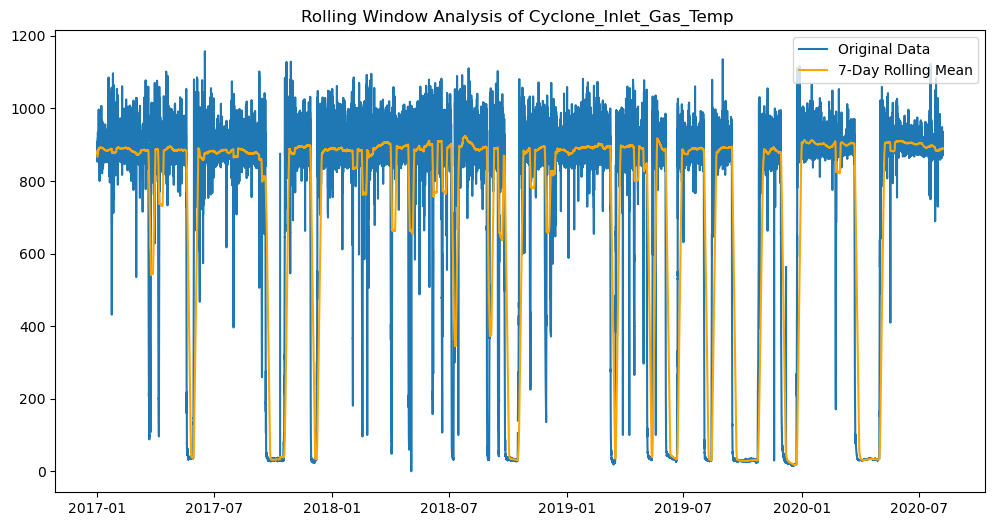

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cyclone_Inlet_Gas_Temp'], label='Original Data')
plt.plot(df.index, df['Cyclone_Inlet_Gas_Temp_Rolling_Mean'], label='7-Day Rolling Mean', color='orange')
plt.legend()
plt.title('Rolling Window Analysis of Cyclone_Inlet_Gas_Temp ')
plt.show()

The plot shows significant fluctuations in the Cyclone Inlet Gas Temperature over time, 
with red dots indicating anomalies detected by the Isolation Forest method. These anomalies suggest potential disruptions or 
inefficiencies in the preheating process that require further investigation

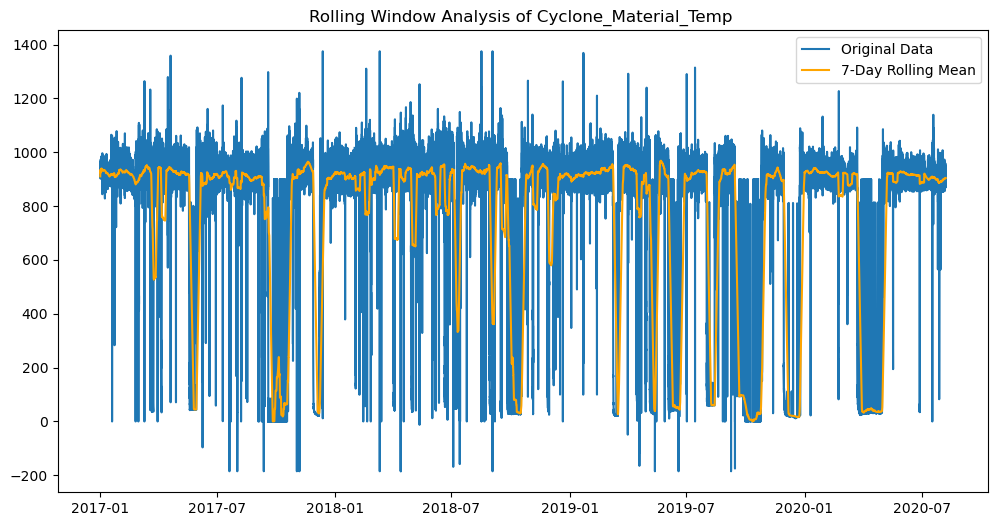

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cyclone_Material_Temp'], label='Original Data')
plt.plot(df.index, df['Cyclone_Material_Temp_Rolling_Mean'], label='7-Day Rolling Mean', color='orange')
plt.legend()
plt.title('Rolling Window Analysis of Cyclone_Material_Temp ')
plt.show()

The Cyclone Material Temperature plot shows several anomalies (red dots) detected by the Isolation Forest, 
suggesting irregularities in the material's temperature behavior. 
These outliers may indicate potential issues in the system that need to be addressed to maintain consistent operations.

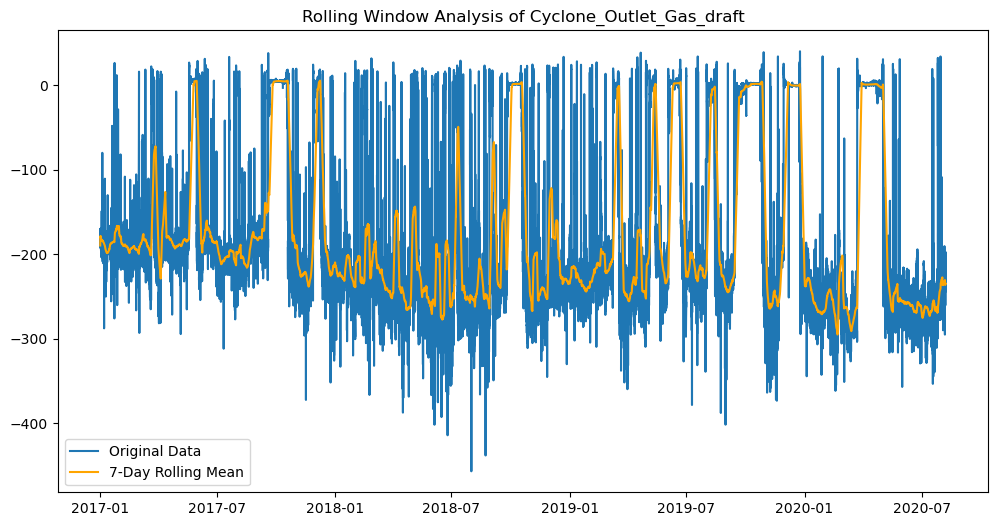

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cyclone_Outlet_Gas_draft'], label='Original Data')
plt.plot(df.index, df['Cyclone_Outlet_Gas_draft_Rolling_Mean'], label='7-Day Rolling Mean', color='orange')
plt.legend()
plt.title('Rolling Window Analysis of Cyclone_Outlet_Gas_draft')
plt.show()

The rolling window analysis of Cyclone Outlet Gas Draft shows significant fluctuations, with the 7-day rolling mean smoothing the data
and revealing underlying trends.
These patterns may indicate periodic changes or shifts in the system's operational conditions.

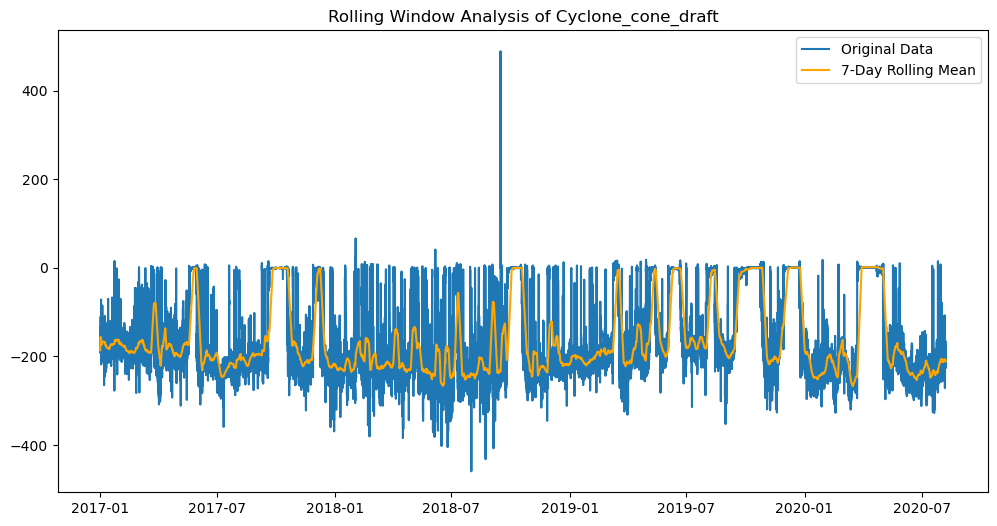

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cyclone_cone_draft'], label='Original Data')
plt.plot(df.index, df['Cyclone_cone_draft_Temp_Rolling_Mean'], label='7-Day Rolling Mean', color='orange')
plt.legend()
plt.title('Rolling Window Analysis of Cyclone_cone_draft')
plt.show()

The 7-day rolling mean effectively smooths out the high-frequency fluctuations in the original data, revealing underlying trends and 
seasonality patterns. The analysis suggests potential periodicity in the data, with peaks and troughs recurring approximately every 6-9 months.

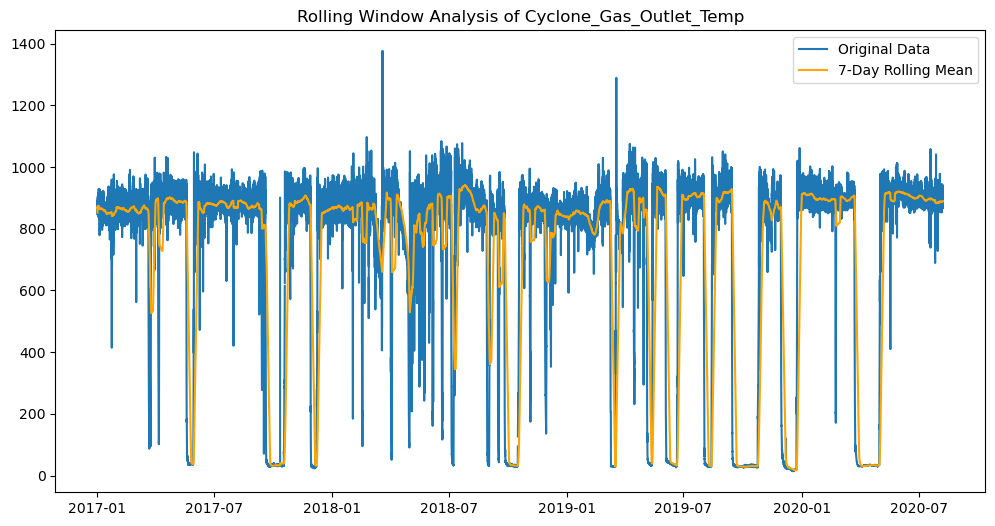

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cyclone_Gas_Outlet_Temp'], label='Original Data')
plt.plot(df.index, df['Cyclone_Gas_Outlet_Temp_Rolling_Mean'], label='7-Day Rolling Mean', color='orange')
plt.legend()
plt.title('Rolling Window Analysis of Cyclone_Gas_Outlet_Temp')
plt.show()

The blue line shows the original temperature data, which is very noisy and fluctuates a lot.

The yellow line is the average temperature over 7 days, which makes it smoother and easier to see trends.

The smooth yellow line suggests that the average temperature might go up and down in a regular pattern, possibly every 6-9 months.

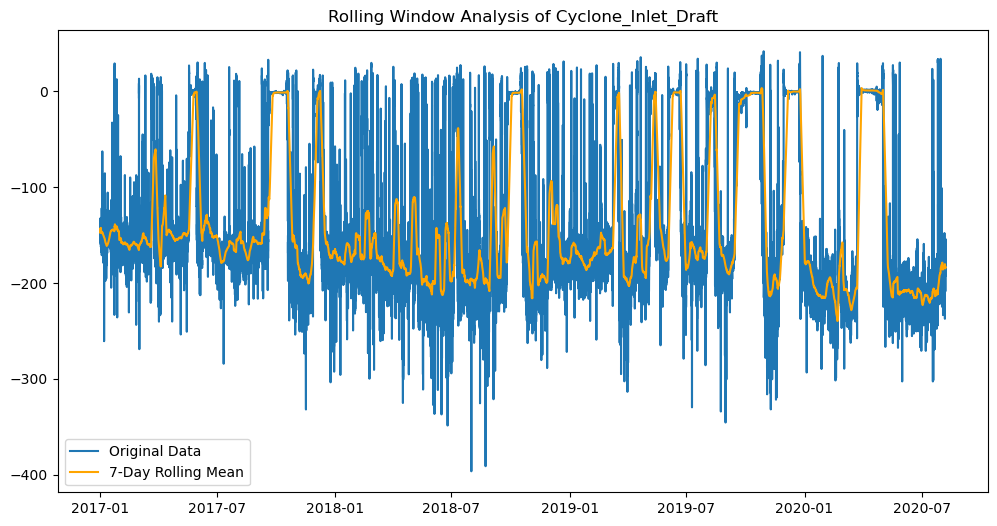

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cyclone_Inlet_Draft'], label='Original Data')
plt.plot(df.index, df['Cyclone_Inlet_Draft_Rolling_Mean'], label='7-Day Rolling Mean', color='orange')
plt.legend()
plt.title('Rolling Window Analysis of Cyclone_Inlet_Draft')
plt.show()

The blue line shows the original temperature data, which is very noisy and fluctuates a lot.

The yellow line is the average temperature over 7 days, which makes it smoother and easier to see trends.

The smooth yellow line suggests that the average temperature goes up maxm  in regular pattern.

In [140]:
## Checking the missing value
print(df.isnull().sum())

Cyclone_Inlet_Gas_Temp                   1320
Cyclone_Material_Temp                    1591
Cyclone_Outlet_Gas_draft                 1321
Cyclone_cone_draft                       1320
Cyclone_Gas_Outlet_Temp                  1321
Cyclone_Inlet_Draft                      1322
Cyclone_Inlet_Gas_Temp_Rolling_Mean         0
Cyclone_cone_draft_Temp_Rolling_Mean        0
Cyclone_Gas_Outlet_Temp_Rolling_Mean        0
Cyclone_Inlet_Draft_Rolling_Mean            0
Cyclone_Material_Temp_Rolling_Mean          0
Cyclone_Outlet_Gas_draft_Rolling_Mean       0
dtype: int64


In [144]:
## Filled the missing  value using median 
df['Cyclone_cone_draft'].fillna(df['Cyclone_cone_draft'].median(), inplace=True)
df['Cyclone_Gas_Outlet_Temp'].fillna(df['Cyclone_Gas_Outlet_Temp'].median(),inplace = True)
df['Cyclone_Inlet_Draft'].fillna(df['Cyclone_Inlet_Draft'].median(),inplace = True)
df['Cyclone_Inlet_Gas_Temp'].fillna(df['Cyclone_Inlet_Gas_Temp'].median(),inplace = True)
df['Cyclone_Material_Temp'].fillna(df['Cyclone_Material_Temp'].median(),inplace = True)
df['Cyclone_Outlet_Gas_draft'].fillna(df['Cyclone_Outlet_Gas_draft'].median(),inplace = True)

In [146]:
print(df.isnull().sum().sum())

0


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [150]:
from sklearn.ensemble import IsolationForest

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_if'] = iso_forest.fit_predict(scaled_data)

# Identify anomalies
df['anomaly_if'] = df['anomaly_if'].apply(lambda x: 1 if x == -1 else 0)
print(df['anomaly_if'].value_counts())

anomaly_if
0    373941
1      3778
Name: count, dtype: int64


In [152]:
import numpy as np

time_steps = 10
sequential_data = []
for i in range(len(scaled_data) - time_steps):
    sequential_data.append(scaled_data[i:i+time_steps])
sequential_data = np.array(sequential_data)

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
autoencoder = Sequential([
    LSTM(64, activation='relu', input_shape=(time_steps, scaled_data.shape[1]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(time_steps * scaled_data.shape[1], activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(sequential_data, sequential_data.reshape(sequential_data.shape[0], -1),
                epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 113s 8ms/step - loss: 0.0318 - val_loss: 0.0029
Epoch 2/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 3/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 4/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 5/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 6/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 7/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 8/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/20
10624/10624 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - loss: 0.0014 - val_loss: 0.0

In [156]:
reconstructed = autoencoder.predict(sequential_data)
reconstruction_error = np.mean(np.abs(reconstructed - sequential_data.reshape(sequential_data.shape[0], -1)), axis=1)

# Set anomaly threshold
threshold = np.percentile(reconstruction_error, 95)

# Identify anomalies
df['anomaly_lstm'] = 0
df['anomaly_lstm'].iloc[time_steps:] = (reconstruction_error > threshold).astype(int)

11804/11804 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step


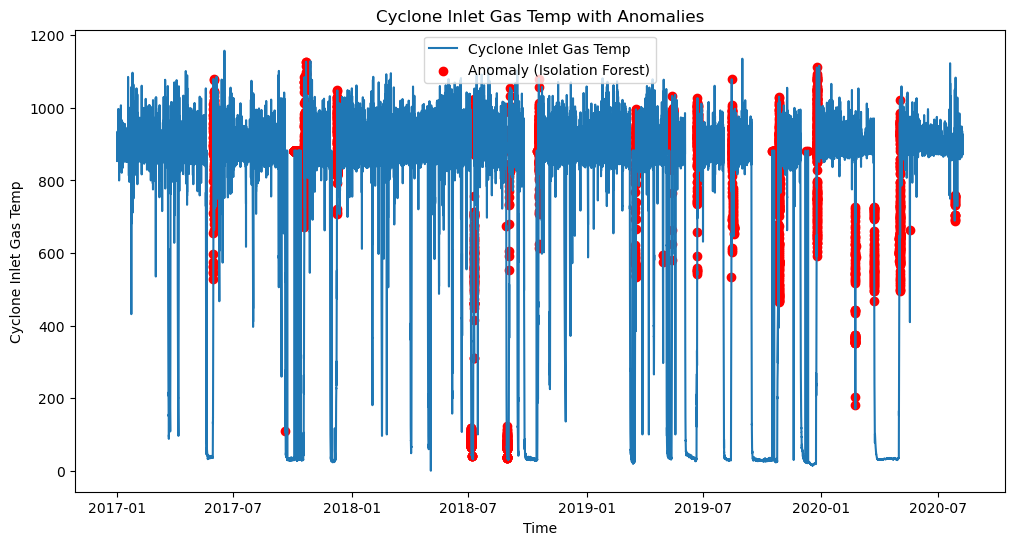

In [158]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Inlet_Gas_Temp'], label='Cyclone Inlet Gas Temp')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_if'] == 1].index, 
            df[df['anomaly_if'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (Isolation Forest)')

plt.title('Cyclone Inlet Gas Temp with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone Inlet Gas Temp')
plt.legend()
plt.show()

The graph shows the Cyclone Inlet Gas Temp over time with anomalies detected using Isolation Forest.
The anomalies are marked with red dots, indicating potential issues or outliers in the gas temperature data.

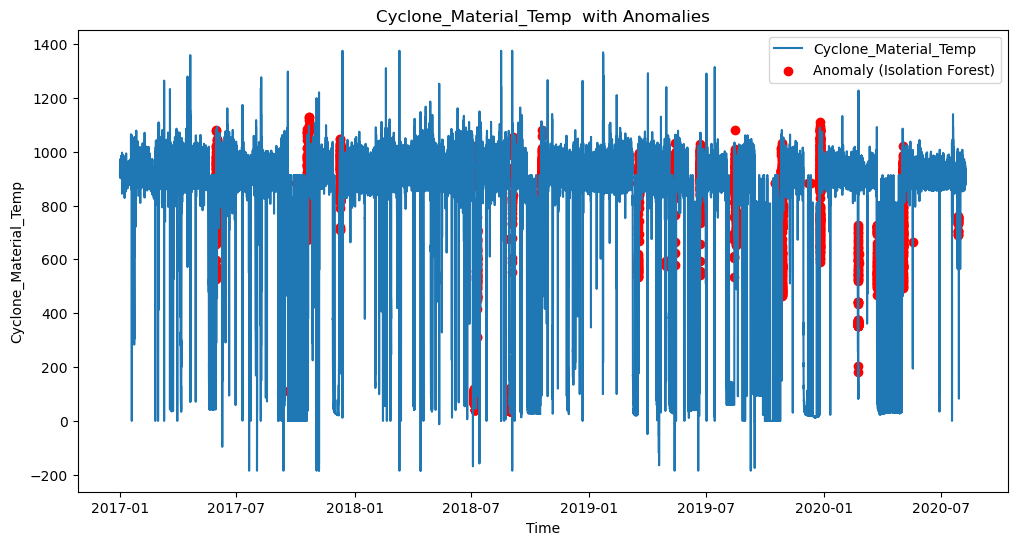

In [160]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Material_Temp'], label='Cyclone_Material_Temp')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_if'] == 1].index, 
            df[df['anomaly_if'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (Isolation Forest)')

plt.title('Cyclone_Material_Temp  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Material_Temp')
plt.legend()
plt.show()

The graph displays the Cyclone Material Temperature over time. The red dots highlight anomalies detected using Isolation Forest, 
indicating potential deviations or unusual behavior in the temperature readings.

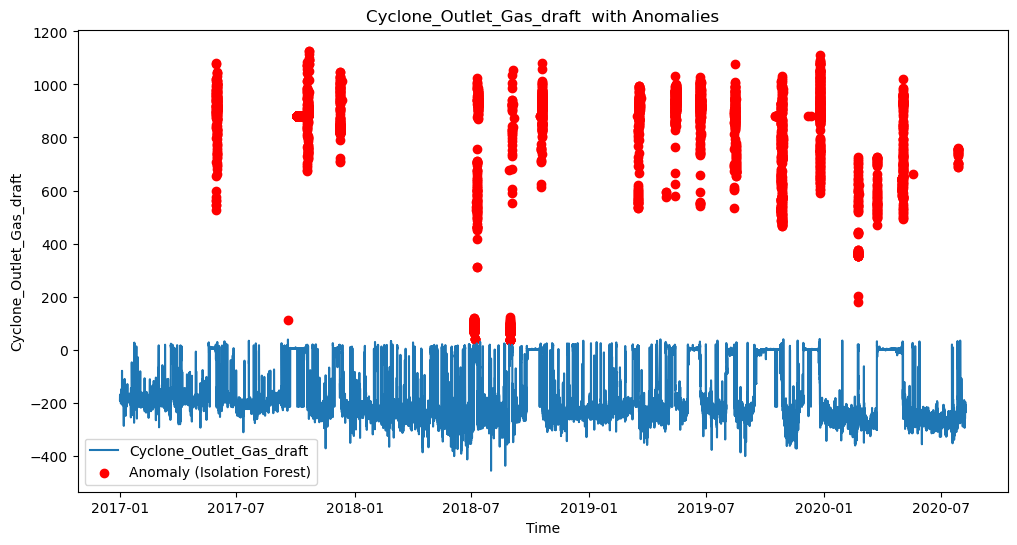

In [162]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Outlet_Gas_draft'], label='Cyclone_Outlet_Gas_draft')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_if'] == 1].index, 
            df[df['anomaly_if'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (Isolation Forest)')

plt.title('Cyclone_Outlet_Gas_draft  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Outlet_Gas_draft')
plt.legend()
plt.show()

The graph illustrates the Cyclone Outlet Gas Draft over time. 
The red dots indicate anomalies detected using Isolation Forest, highlighting unusual fluctuations or deviations in the draft measurements.

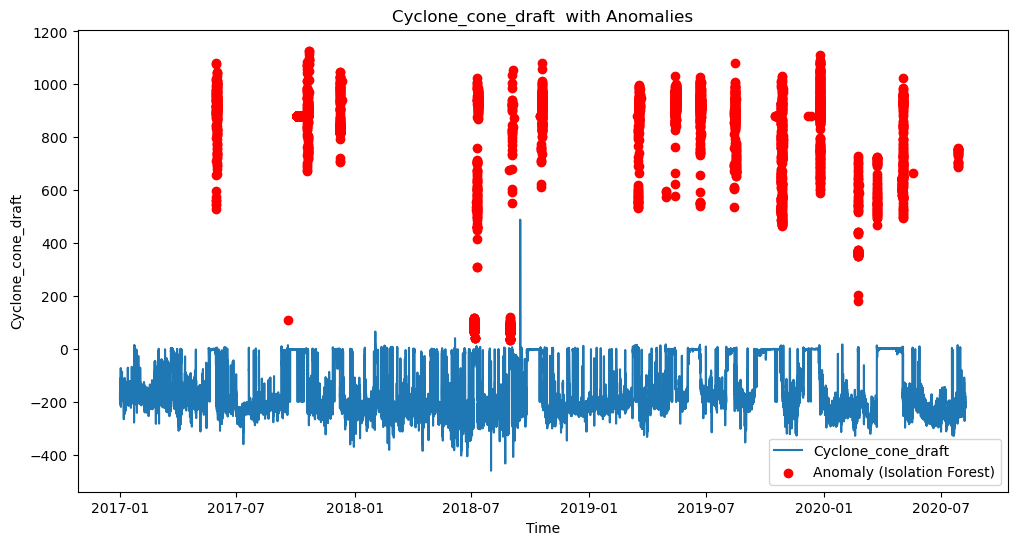

In [164]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_cone_draft'], label='Cyclone_cone_draft')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_if'] == 1].index, 
            df[df['anomaly_if'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (Isolation Forest)')

plt.title('Cyclone_cone_draft  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_cone_draft')
plt.legend()
plt.show()

The graph displays the Cyclone Cone Draft over time. The red dots highlight anomalies detected using Isolation Forest, 
indicating unusual variations or deviations in the draft measurements.

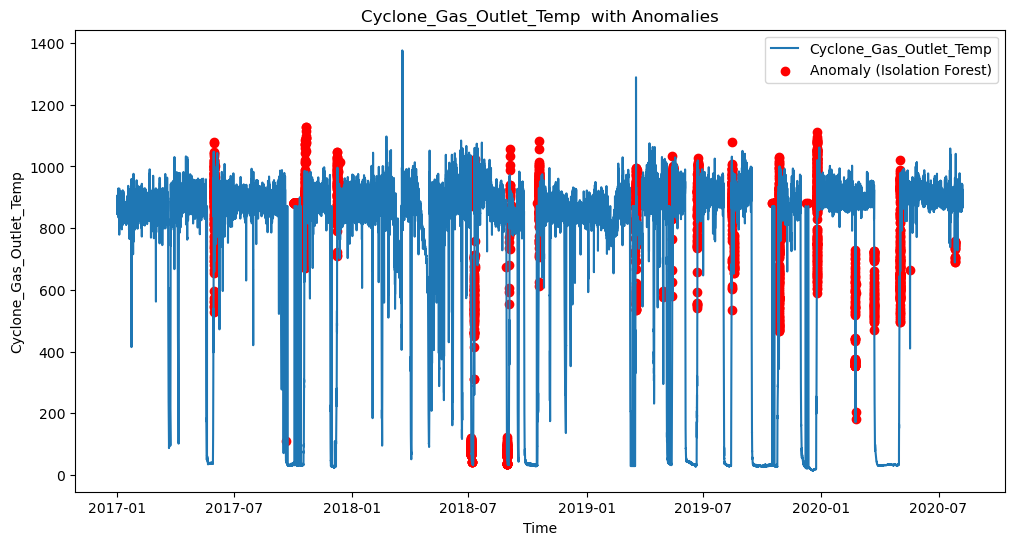

In [166]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Gas_Outlet_Temp'], label='Cyclone_Gas_Outlet_Temp')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_if'] == 1].index, 
            df[df['anomaly_if'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (Isolation Forest)')

plt.title('Cyclone_Gas_Outlet_Temp  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Gas_Outlet_Temp')
plt.legend()
plt.show()

The graph illustrates the Cyclone Gas Outlet Temperature over time. 
The red dots indicate anomalies detected using Isolation Forest, highlighting unusual fluctuations or deviations in the temperature readings.

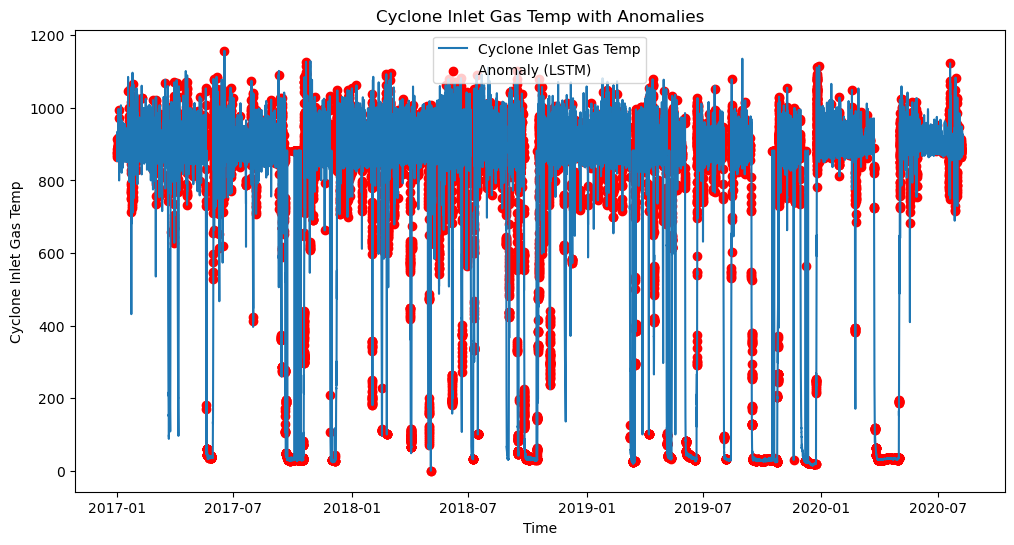

In [170]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Inlet_Gas_Temp'], label='Cyclone Inlet Gas Temp')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_lstm'] == 1].index, 
            df[df['anomaly_lstm'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (LSTM)')

plt.title('Cyclone Inlet Gas Temp with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone Inlet Gas Temp')
plt.legend()
plt.show()

The graph displays the Cyclone Inlet Draft over time. The red dots highlight anomalies detected using LSTM, 
indicating unusual variations or deviations in the draft measurements.

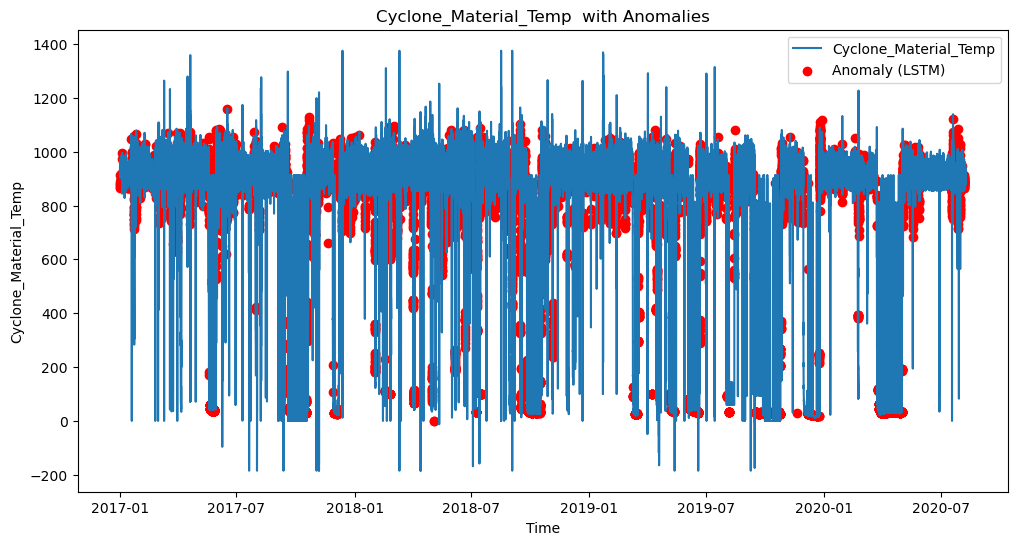

In [182]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Material_Temp'], label='Cyclone_Material_Temp')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_lstm'] == 1].index, 
            df[df['anomaly_lstm'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (LSTM)')

plt.title('Cyclone_Material_Temp  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Material_Temp')
plt.legend()
plt.show()

The graph displays the Cyclone Material Temperature over time. 
The red dots highlight anomalies detected using LSTM, indicating potential deviations or unusual behavior in the temperature readings.

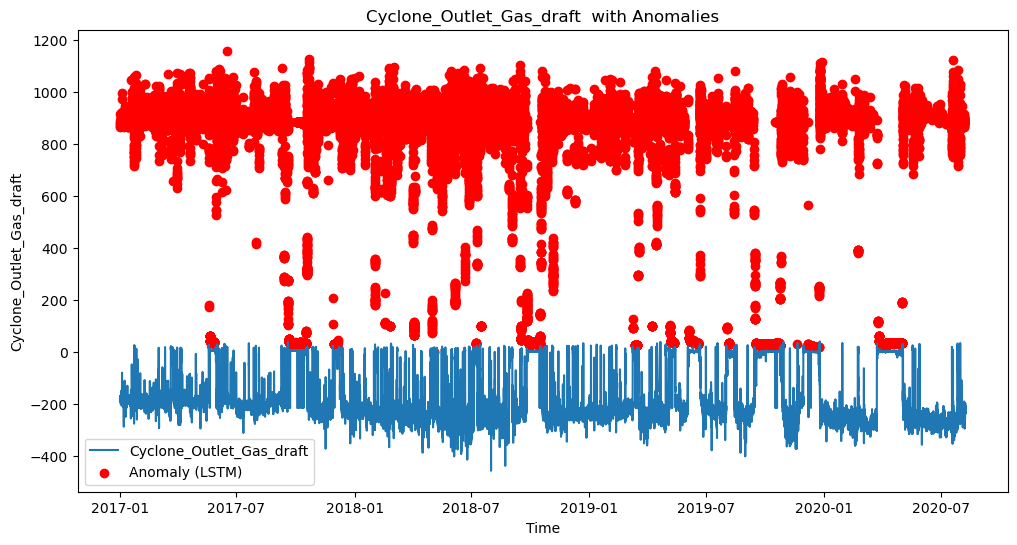

In [180]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Outlet_Gas_draft'], label='Cyclone_Outlet_Gas_draft')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_lstm'] == 1].index, 
            df[df['anomaly_lstm'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (LSTM)')

plt.title('Cyclone_Outlet_Gas_draft  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Outlet_Gas_draft')
plt.legend()
plt.show()

The graph displays the Cyclone Outlet Gas Draft over time. The red dots highlight anomalies detected using LSTM, 
indicating unusual variations or deviations in the draft measurements

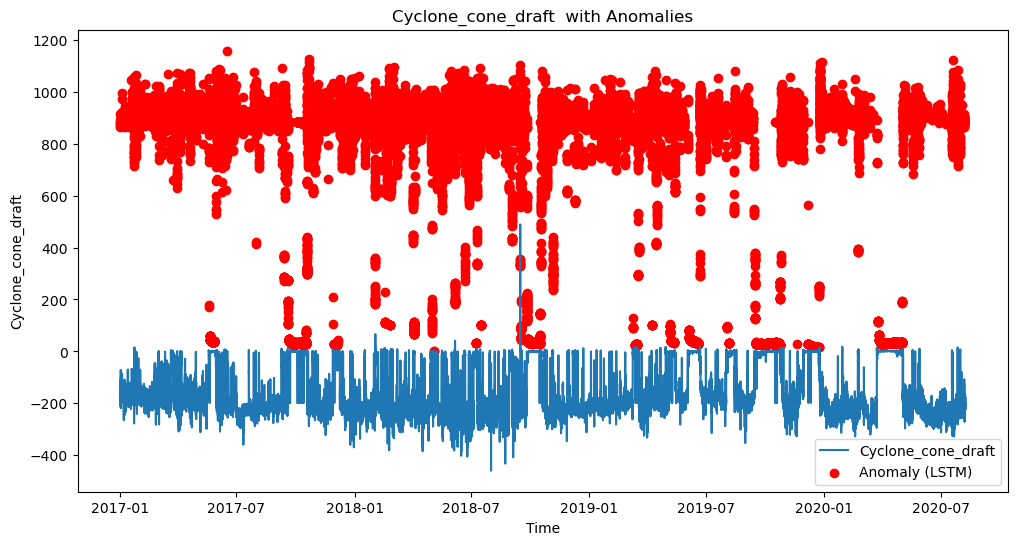

In [178]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_cone_draft'], label='Cyclone_cone_draft')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_lstm'] == 1].index, 
            df[df['anomaly_lstm'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (LSTM)')

plt.title('Cyclone_cone_draft  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_cone_draft')
plt.legend()
plt.show()

The graph displays the Cyclone Cone Draft over time. 
The red dots highlight anomalies detected using LSTM, indicating unusual variations or deviations in the draft measurements.

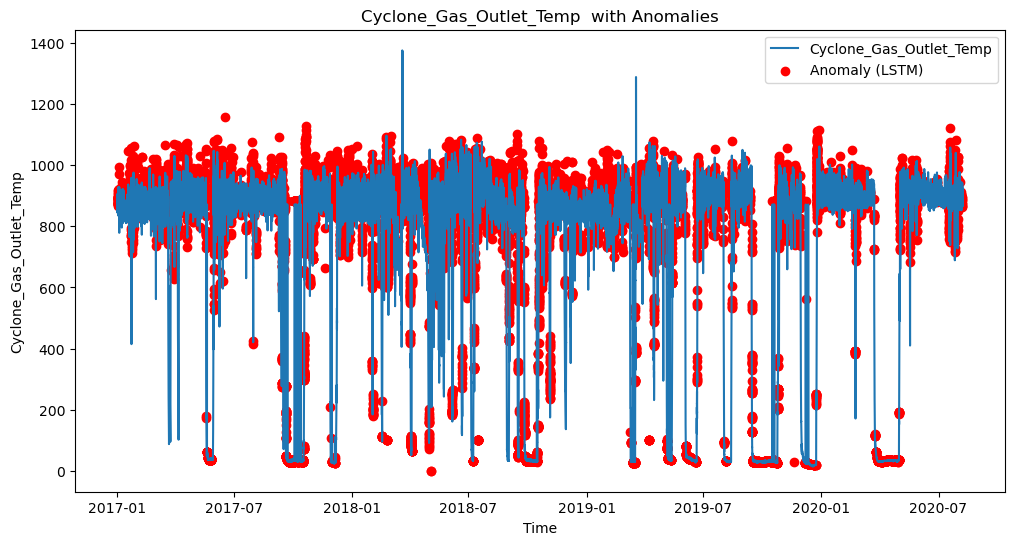

In [184]:
plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Gas_Outlet_Temp'], label='Cyclone_Gas_Outlet_Temp')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_lstm'] == 1].index, 
            df[df['anomaly_lstm'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (LSTM)')

plt.title('Cyclone_Gas_Outlet_Temp  with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Gas_Outlet_Temp')
plt.legend()
plt.show()

The graph displays the Cyclone Gas Outlet Temperature over time. 
The red dots highlight anomalies detected using LSTM, indicating unusual fluctuations or deviations in the temperature readings.

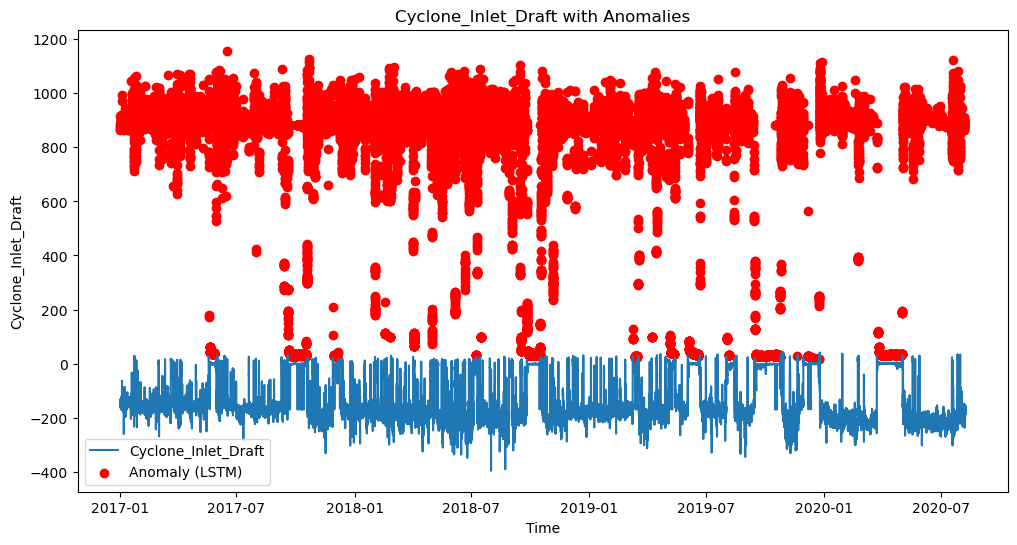

In [186]:

plt.figure(figsize=(12, 6))

# Plot the Cyclone Inlet Gas Temp
plt.plot(df.index, df['Cyclone_Inlet_Draft'], label='Cyclone_Inlet_Draft')

# Highlight anomalies using red scatter points
plt.scatter(df[df['anomaly_lstm'] == 1].index, 
            df[df['anomaly_lstm'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomaly (LSTM)')

plt.title('Cyclone_Inlet_Draft with Anomalies')
plt.xlabel('Time')
plt.ylabel('Cyclone_Inlet_Draft')
plt.legend()
plt.show()

In [ ]:
The graph displays the Cyclone Inlet Draft over time. 
The red dots highlight anomalies detected using LSTM, indicating unusual variations or deviations in the draft measurements.

In [188]:
import pandas as pd

# Step 1: Filter the dataset for anomalies
anomaly_data = df[df['anomaly_if'] == 1]

# Ensure the dataframe is sorted by the index (time)
anomaly_data = anomaly_data.sort_index()

# Step 2: Group consecutive anomalies
# Calculate the time difference between consecutive anomalies
anomaly_data['time_diff'] = anomaly_data.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., anomalies occurring within 1 hour are considered consecutive)
threshold = 3600  # 1 hour in seconds
anomaly_data['group'] = (anomaly_data['time_diff'] > threshold).cumsum()

# Step 3: Aggregate results
grouped_anomalies = anomaly_data.groupby('group').agg(
    start_time=('time_diff', lambda x: x.index.min()),  # First timestamp in the group
    end_time=('time_diff', lambda x: x.index.max()),  # Last timestamp in the group
    num_anomalies=('time_diff', 'count')  # Number of anomalies in the group
).reset_index()

# Display the grouped anomalies
print(grouped_anomalies)


     group          start_time            end_time  num_anomalies
0        0 2017-05-30 20:35:00 2017-05-30 23:00:00             29
1        1 2017-05-31 00:05:00 2017-05-31 06:30:00             51
2        2 2017-05-31 07:50:00 2017-05-31 11:05:00             24
3        3 2017-05-31 12:15:00 2017-05-31 12:15:00              1
4        4 2017-05-31 16:20:00 2017-05-31 16:20:00              1
..     ...                 ...                 ...            ...
118    118 2020-05-02 06:45:00 2020-05-02 08:10:00             11
119    119 2020-05-02 09:50:00 2020-05-02 16:10:00             47
120    120 2020-05-02 17:15:00 2020-05-02 21:05:00             20
121    121 2020-05-17 12:05:00 2020-05-17 12:05:00              1
122    122 2020-07-26 07:05:00 2020-07-26 09:05:00             22

[123 rows x 4 columns]


In [190]:
import pandas as pd

# Step 1: Filter the dataset for anomalies
anomaly_data = df[df['anomaly_lstm'] == 1]

# Ensure the dataframe is sorted by the index (time)
anomaly_data = anomaly_data.sort_index()

# Step 2: Group consecutive anomalies
# Calculate the time difference between consecutive anomalies
anomaly_data['time_diff'] = anomaly_data.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., anomalies occurring within 1 hour are considered consecutive)
threshold = 3600  # 1 hour in seconds
anomaly_data['group'] = (anomaly_data['time_diff'] > threshold).cumsum()

# Step 3: Aggregate results
grouped_anomalies = anomaly_data.groupby('group').agg(
    start_time=('time_diff', lambda x: x.index.min()),  # First timestamp in the group
    end_time=('time_diff', lambda x: x.index.max()),  # Last timestamp in the group
    num_anomalies=('time_diff', 'count')  # Number of anomalies in the group
).reset_index()

# Display the grouped anomalies
print(grouped_anomalies)


      group          start_time            end_time  num_anomalies
0         0 2017-01-01 15:50:00 2017-01-01 16:20:00              5
1         1 2017-01-02 04:35:00 2017-01-02 07:30:00             24
2         2 2017-01-03 12:40:00 2017-01-03 13:10:00              5
3         3 2017-01-04 05:45:00 2017-01-04 06:25:00              7
4         4 2017-01-07 00:00:00 2017-01-07 00:40:00              9
...     ...                 ...                 ...            ...
1636   1636 2020-08-01 19:20:00 2020-08-01 19:20:00              1
1637   1637 2020-08-02 19:45:00 2020-08-02 19:45:00              1
1638   1638 2020-08-03 09:00:00 2020-08-03 09:25:00              2
1639   1639 2020-08-05 11:40:00 2020-08-05 13:15:00             11
1640   1640 2020-08-05 15:15:00 2020-08-05 18:40:00             27

[1641 rows x 4 columns]
